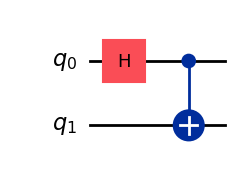

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')   #generation of Bell state

In [2]:
from qiskit.quantum_info import Pauli
#operators
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ') 
XX = Pauli('XX') #two qubit xx operator
XI = Pauli('XI') #single qubit XI operator
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]  #observables are created

In [3]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables) #multiplying the number of quantum circles by the number of observables

job.result()

EstimatorResult(values=array([ 1.        , -0.04101562, -0.04101562,  1.        , -0.00195312,
       -0.00195312]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0177397, 'sample_measure_time': 0.0017912, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 8069, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9983177185058594, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0177397, 'sample_measure_time': 0.001791

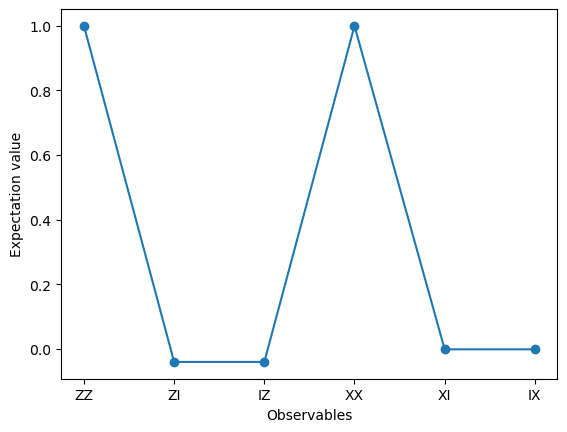

In [4]:
import matplotlib.pyplot as plt
data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI','IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()